**Оглавление:**
1. [Изучение данных](#step1)  
2. [Предобработка данных](#step2) 
3. [Расчёты и добавление результатов в таблицу](#step3)
4. [Исследовательский анализ данных](#step4)
5. [Общий вывод](#step5)
6. [Баг-репорт](#step6)

<a id="step1"></a>
## Изучение данных

Для начала имортируем необходимые библиотеки:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Прочитаем файл с данными:

In [2]:
df = pd.read_csv('datasets/real_estate_data.csv', sep='\t') # прочитаем файл и разделим данные по символам `\t`

Рассмотрим наш датасет:

In [3]:
display(df.head().T) # получим первые 10 строк таблицы df
display(df.info())# получим общую информацию о данных в таблице df

,0,1,2,3,4
total_images,20,7,10,0,2
last_price,13000000.0,3350000.0,5196000.0,64900000.0,10000000.0
total_area,108.0,40.4,56.0,159.0,100.0
first_day_exposition,2019-03-07T00:00:00,2018-12-04T00:00:00,2015-08-20T00:00:00,2015-07-24T00:00:00,2018-06-19T00:00:00
rooms,3,1,2,3,2
ceiling_height,2.7,NaN,NaN,NaN,3.03
floors_total,16.0,11.0,5.0,14.0,14.0
living_area,51.0,18.6,34.3,NaN,32.0
floor,8,1,4,9,13
is_apartment,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

В таблице имеем 22 столбца и 23699 строк. Типы данных столбцов: `float`, `int`, `object`, `bool`. 

Видим, что в 14 столбцах имеются пропущенные значения. Поскольку мы знаем, что часть данных была заполнена автоматически на основе картографических данных, мы можем предположить, что данные в этих колонках отсутствуют ввиду не обозначенного картографического расположения. Другая же часть данных могла быть по каким-то причинам не заполнена самими пользователями или утеряна. Например, можем предположить, что пропуски в поле `balcony` означают, что балконов в квартире нет.

**Вывод**

Мы имеем датасет с данными об объявлениях продажи недвижимости в Санкт-Петербурге и Ленинградской области за несколько лет.

Предварительно можно утверждать, что данных достаточно для определения параметров рыночной стоимости объектов недвижимости. Но в данных встречается большое количество пропусков, а также, предположительно, колонок с данными, которые не потребуются для нашего исследования.

Написание в столбце `cityCenters_nearest` не соответствует змеиному регистру.

Для дальнейшей работы потребуется предобработка данных.

<a id="step2"></a>
## Предобработка данных

### Обработка пропусков

Посчитаем, сколько в таблице пропущенных значений:

In [4]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Видим очень большое количество пропусков в столбце `is_apartment` с булевым типом данных. Будем считать, что это незначительный для нас параметр и удалим данный столбец. По схожим причинам уберем столбцы `parks_nearest` и `ponds_nearest`. Также в списке мы видим столбец `total_images`, который не несет для нас совершенно никакой информации, поэтому удалим и его тоже. Это поможет сделать таблицу более удобной для чтения.

In [5]:
df = df.drop(columns=['total_images', 'is_apartment', 'airports_nearest', 'parks_around3000', 'ponds_around3000'])

Заполним пропуски в столбце `locality_name` строкой `Неизвестно`.

In [6]:
df['locality_name'] = df['locality_name'].fillna(value='Неизвестно')

Предположим, что пропуски в столбце `balcony` связаны с тем, что в квартире балкон отсутствует. Заполним пропуски в этом столбце нулями: 

In [7]:
df['balcony'] = df['balcony'].fillna(value=0)

Сделаем предположение, что пропуски в столбце `days_exposition` не случайны и говорят нам о том, что объявление не было снято с публикации. В таком случае самые поздние по хронологии объявления должны быть вероятнее всего в незавершенном состоянии. Построим график распределения пропусков в столбце по времени:

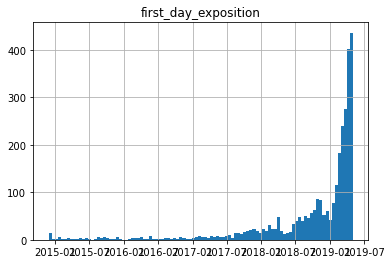

In [56]:
df[df['days_exposition'].isna()].hist('first_day_exposition', bins=100);

Наше предположение подтвердилась. Получается, пропуски в этом столбце говорят нам о том, что объявление не было снято с публикации. В таком случае оставим эти пропуски незаполненными.

Применим метод `corr()` к нашей таблице. Посмотрим, как коррелирует столбец с жилой площадью `living_area` с другими столбцами: 

In [9]:
df.corr()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,cityCenters_nearest,parks_nearest,ponds_nearest,days_exposition
last_price,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,-0.025362,-0.008802,0.519869,0.008559,-0.206747,-0.016414,-0.084809,0.081146
total_area,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.009941,-0.231446,-0.021497,-0.097969,0.149675
rooms,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,-0.015519,-0.184864,-0.054549,-0.057689,0.126961
ceiling_height,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.001674,0.042777,0.087641,0.031216,-0.091689,-0.019167,-0.059090,0.019091
floors_total,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,0.070151,0.050791,0.163944,0.172812,0.019774,0.097527,0.038864,-0.052234
living_area,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,-0.056231,-0.033711,0.428674,-0.014772,-0.231368,-0.050167,-0.081674,0.142454
floor,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168567,0.009084,0.073045,0.024850,-0.039463
studio,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,1.000000,-0.004235,NaN,0.028899,-0.007029,0.009134,0.002606,-0.022476
open_plan,-0.008802,-0.034885,-0.087500,0.042777,0.050791,-0.033711,0.035824,-0.004235,1.000000,NaN,0.032639,-0.004204,0.010612,-0.003328,-0.024112
kitchen_area,0.519869,0.609121,0.269945,0.087641,0.163944,0.428674,0.135531,NaN,NaN,1.000000,0.045271,-0.190049,0.029641,-0.105223,0.100586


Видим достаточно сильную зависимость со столбцами `rooms` и `total_area`. Поскольку общее количество значений в столбце `rooms` у нас явно меньше, чем в столбце `total_area`, выберем для заполнения число комнат. Заполним пропуски средним значением по числу комнат:

In [10]:
df['living_area'] = df.groupby('rooms')['living_area'].apply(lambda s: s.fillna(s.mean()))

Из матрицы корреляций видим, что столбец `kitchen_area` сильнее всего коррелирует с данными в стоблце `total_area`. Заполним пропуски средним значением по общей площади и проверим количество пустых значений:

In [11]:
df['kitchen_area'] = df.groupby('total_area')['kitchen_area'].apply(lambda s: s.fillna(s.mean()))
df['kitchen_area'].isna().sum()

205

Видим, что осталось еще 205 незаполненных значений. Заполним их средним значением по столбцу. Проверим, что пустых значений не осталось:

In [12]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_area'].mean())
df['kitchen_area'].isna().sum()

0

Пропуски в столбце `floors_total` заполним значением для этой же строки из столбца `floor`,т.е. предположим, что указанный этаж и является последним этажом:

In [13]:
df['floors_total'] = df['floors_total'].fillna(df['floor'])

Предположим, что высота потолков связана с этажностью дома. Например, дома этажностью 8 этажей и ниже (за исключением хрущевок) вполне могут относится к старому фонду, где высота потолков выше среднего. Дома же от 9 этажей и выше - это скорее всего панельные дома и новостройки, где высота потолков будет ниже, чем в старом фонде. Основываясь на этом заполним пропуски в столбце `ceiling_height` средней высотой потолков по этажности дома.

In [14]:
df['ceiling_height'] = df.groupby('floors_total')['ceiling_height'].apply(lambda s: s.fillna(s.mean()))
df['ceiling_height'].isna().sum()

1

Видим, что осталось еще 1 незаполненное значение. Заполним его средним значением по столбцу. Проверим, что пустых значений не осталось:

In [15]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df['ceiling_height'].isna().sum()

0

При изучении названий колонок мы обратили внимание, что написание в столбце `cityCenters_nearest` не соответствует змеиному регистру. Исправим это недоразумение:

In [16]:
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

Пропуски в столбце `city_centers_nearest` заполним в соответствии расположением населенных пунктов. Поскольку не у всех населенных пунктов указано расстояние до центра СПб и не получается просто заполнить их средним значением в соотвествии с названием населенного пункта, мы условно разделим данные на СПб и Ленинградскую область, и далее заполним пропуски в соответствии с категорией. Напишем функцию `region_separation` для разделения данных и применим ее для создания нового столбца `region_group`. Далее заполним все пропуски медианным значением по категории.

In [17]:
def region_separation(region):
    if region == 'Санкт-Петербург':
        return 'в пределах КАД'
    return 'за пределами КАД'

df['region_group'] = df['locality_name'].apply(region_separation)
df['city_centers_nearest'] = df.groupby('region_group')['city_centers_nearest'].fillna(df['city_centers_nearest'].median())

Проверим, все ли пропуски мы заполнили:

In [18]:
df.isna().sum()

last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
city_centers_nearest        0
parks_nearest           15620
ponds_nearest           14589
days_exposition          3181
region_group                0
dtype: int64

**Вывод**

Мы удалили несколько столбцов, а также заполнили пропуски в столбцах `locality_name`, `balcony`, `living_area`, `kitchen_area`, `floors_total`, `ceiling_height`, `city_centers_nearest`. 

Обнаружили, что пропуски в столбце `days_exposition` скорее всего означают, что объявление не было снятно с публикации, и оставили пропуски незаполненными.

Привели столбец `city_centers_nearest` к змеиному регистру.

Оставили незаполненными некоторые пропуски, поскольку есть предположение, что данные из этих колонок не будут иметь значения для нашего исследования.

### Замена типа данных

В таблице имеем несколько столбцов (`last_price`, `floors_total`, `balcony`, `city_centers_nearest`) с данными вещественного типа `float`. Все данные в этих столбцах не имеют дробной части. Приведем данные в этих столбцах к целочисленному типу `int`:

In [19]:
df = df.astype({'last_price': 'int', 'floors_total': 'int', 'balcony': 'int', 'city_centers_nearest': 'int'})

Для проведения дальнейших операций преобразуем формат столбца `first_day_exposition` и округлим значения до дня, т.к. видим, что данные в этом столбце не содержат в себе значений часа/минуты/секунды. Проверим результат смены типа данных:

In [20]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format ='%Y-%m-%dT%H:%M:%S').dt.round('1D')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            23699 non-null  int32         
 1   total_area            23699 non-null  float64       
 2   first_day_exposition  23699 non-null  datetime64[ns]
 3   rooms                 23699 non-null  int64         
 4   ceiling_height        23699 non-null  float64       
 5   floors_total          23699 non-null  int32         
 6   living_area           23699 non-null  float64       
 7   floor                 23699 non-null  int64         
 8   studio                23699 non-null  bool          
 9   open_plan             23699 non-null  bool          
 10  kitchen_area          23699 non-null  float64       
 11  balcony               23699 non-null  int32         
 12  locality_name         23699 non-null  object        
 13  city_centers_nea

**Вывод**

В столбцах `last_price`, `floors_total`, `balcony` и `city_centers_nearest` мы заменили вещественный тип данных на целочисленный.
Столбец `first_day_exposition` привели к формату `datetime`.

<a id="step3"></a>
## Расчёты и добавление результатов в таблицу

Добавим в таблицу столбец `sqm_price`, который содержит в себе цену квадратного метра:

In [21]:
df['sqm_price'] = df['last_price']/df['total_area']

Далее создадим в таблице столбцы `weekday`, `month`, `year`, в которые внесем соответствующую информацию о дне недели, месяце и годе публикации объявления:

In [22]:
df['weekday'] =df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

Выделим категории для этажа квартиры (`первый`, `последний`, `другой`). Для этого напишем функцию `floor_category`, и при помощи неё внесем соответствующие данные о категории этажа в новый столбец `floor_type`:

In [23]:
def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

df['floor_type'] = df.apply(floor_category, axis=1)

Посчитаем соотношение жилой и общей площади, а также отношение площади кухни к общей и внесем эти значения в соответсвующие столбцы `living_to_total` и `kitchen_to_total`:

In [24]:
df['living_to_total'] = df['living_area']/df['total_area']
df['kitchen_to_total'] = df['kitchen_area']/df['total_area']

Создадим столбец `city_centers_km` с расстоянием до центра в километрах. Округлим значение в столбце до целых значений и переведем его в тип данных int.

In [25]:
df['city_centers_km'] = round(df['city_centers_nearest']/1000).astype('int')

**Вывод**

Мы посчитали значения:
* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры, варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей;
* расстояние до центра в километрах;

и добавили в таблицу соответствующие столбцы.

<a id="step4"></a>
## Исследовательский анализ данных

### Изучение параметров

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Помним, что столбец `ceiling_height` содержит в себе пропущенные значения, заполненные нулями. Используем метод `.describe()`:

In [26]:
display(df['total_area'].describe())
display(df['last_price'].describe())
display(df['rooms'].describe())
display(df['ceiling_height'].describe())

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

count    23699.000000
mean         2.772317
std          0.992602
min          1.000000
25%          2.599093
50%          2.712090
75%          2.793191
max        100.000000
Name: ceiling_height, dtype: float64

Построим гистограммы для этих параметров:

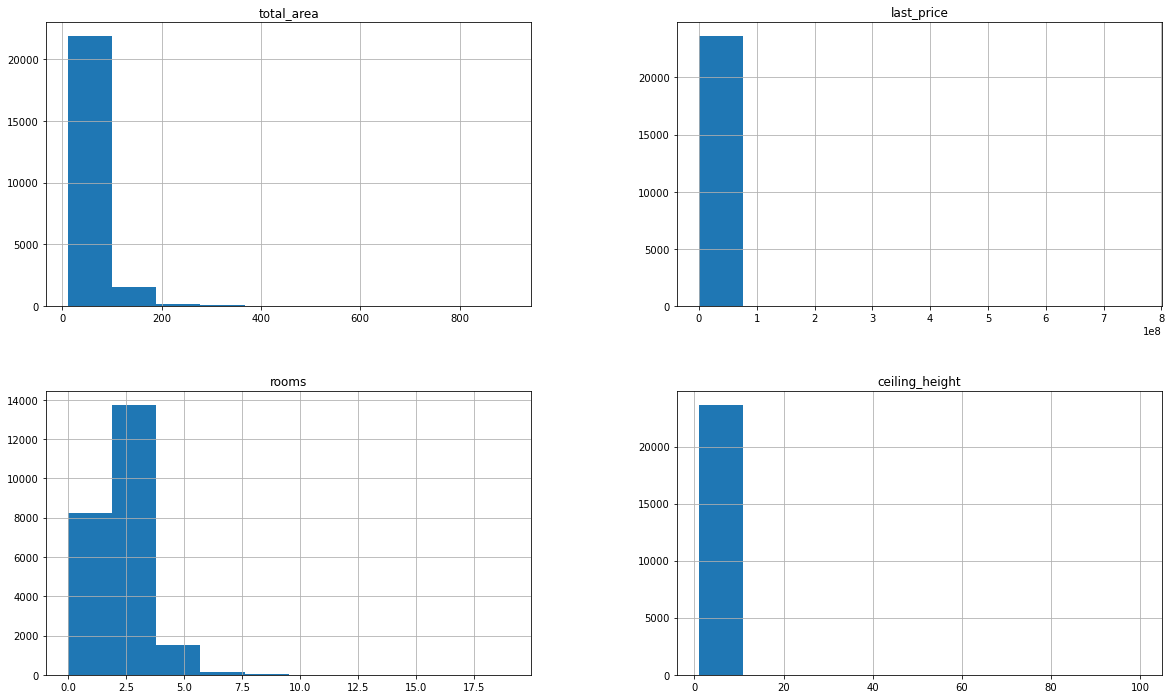

In [27]:
df[['total_area', 'last_price', 'rooms',  'ceiling_height']].hist(figsize=(20,12));

Видим, что на всех гистограммах распределение по виду не похоже на нормальное, и везде имеются длинные "хвосты", т.е. большое количество выбросов. Попробуем рассмотреть эти же гистограммы, исключая совсем неправдоподобные значения.

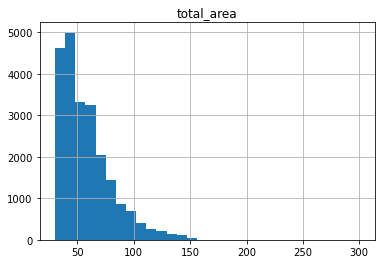

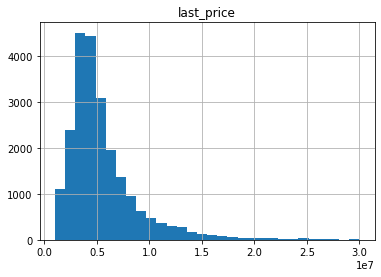

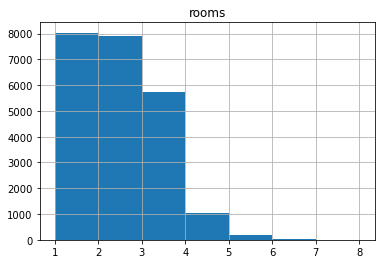

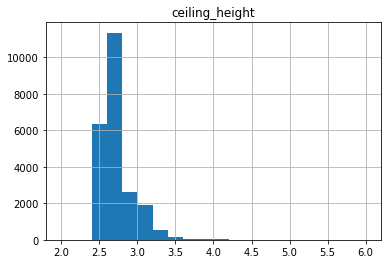

In [59]:
df.hist('total_area', bins=30, range=(30,300))
df.hist('last_price', bins=30, range=(1000000,30000000))
df.hist('rooms', bins=7, range=(1,8))
df.hist('ceiling_height', bins=20, range=(2,6));

Видим, что выбросы скорее мешают нашему исследованию, поэтому впоследствии мы от них избавимся (п.4.3).
На каждой гистограмме отчетливо видны пиковые значения по каждому параметру, которые мы можем явно выделить:

* общая площать ~ 40-45 м²;
* стоимость жилья 4 млн.;
* количество комнат - 2;
* высота потолков 2.7 м.


**Вывод**

Мы рассмотрели ключевые характеристики (площадь, цена, количество комнат, высота потолков) квартир из датасета и выделили среди них наиболее часто встречающиеся значения .

### Время продажи квартиры

Рассмотрим гистограмму времени продажи квартир:

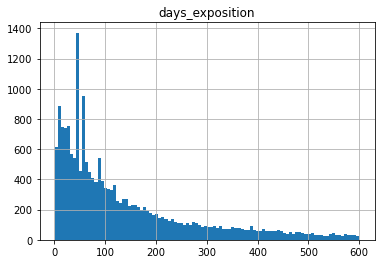

In [29]:
df.hist('days_exposition', bins=100, range=(1,600));

На гистограмме видим выраженные пики 45 и 60 днях, а также пики поменьше на 7, 30 и 90 днях. Возможно они вызваны некой спецификой оформления сделок с недвижимостью (срок рассмотрения заявлений в банке или нечто подобное) или особенностями сервиса, например, продвижением объявлений к течение какого-то периода. 

Рассчитаем среднее и медиану по столбцу (помним, что мы заполнили нулями отсутствующие значения, поэтому исключим эти строки из расчета) и построим диаграмму размаха:

180.88863436982163

95.0

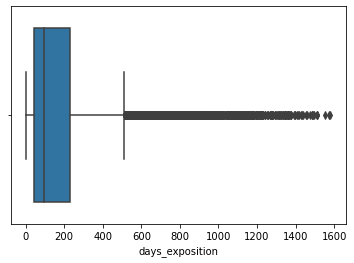

In [30]:
display(df[df['days_exposition'] > 0]['days_exposition'].mean())
display(df[df['days_exposition'] > 0 ]['days_exposition'].median())
sns.boxplot(x=df['days_exposition']);

Видим, что медианное значение почти в 2 раза меньше среднего. Это говорит нам об очень большом количестве выбросов, которые мы так же видим на диаграмме размаха. 

Если оценивать скорость продажи квартиры глядя на гистограмму и полученное медианное значение (порядка 3 месяцев), можно сказать, что к быстрым продажам мы можем отнести продажи продолжительностью менее 1 месяца, а к очень долгим - продажи продолжительностью более 200 дней.

**Вывод**

Мы рассмотрели данные продолжительности продажи квартир и пришли к выводу, что медианная продолжительность продажи квартир - около 3 месяцев. Если продажа заняла менее месяца, можно назвать ее быстрой, если более 200 дней - очень долгой.

### Редкие и выбивающиеся значения

Ранее мы уже говорили и том, что в датасете содержатся сильно выбивающиеся значения в колонках `total_area`, `rooms`, `ceiling_height`. Например, очевидно нас не интересуют квартиры очень большой площади (сотни квадратных метров), с очень большим количетвом комнат и потолками порядка 10м.
Рассмотрим подробней имеющиеся значения (получим значения методом `.describe()` и рассмотрим диаграммы размаха):

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

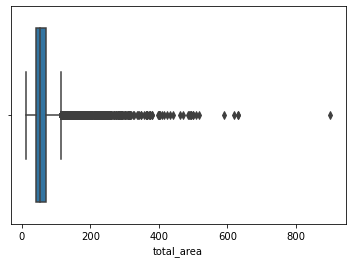

In [31]:
sns.boxplot(x=df['total_area'])
df['total_area'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

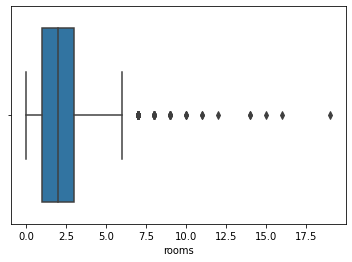

In [32]:
sns.boxplot(x=df['rooms'])
df['rooms'].describe()

count    23699.000000
mean         2.772317
std          0.992602
min          1.000000
25%          2.599093
50%          2.712090
75%          2.793191
max        100.000000
Name: ceiling_height, dtype: float64

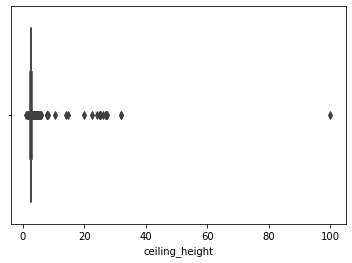

In [33]:
sns.boxplot(x=df['ceiling_height'])
df['ceiling_height'].describe()

По всем трем столбцам видим большое количество выбросов, от которых хотелось бы избавиться.
Применим следующие ограничения:
* ограничим площать квартир 150 м²;
* ограничимся 6 комнатами;
* высоту потолков обозначим от 2 до 5 метров.

In [34]:
df = df.loc[df['total_area'] <= 150]
df = df.loc[df['rooms'] <= 6]
df = df.loc[(df['ceiling_height'] >= 2) & (df['ceiling_height'] <= 5)]

Посмотрим, насколько сильно сократился наш датасет:

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23090 entries, 0 to 23698
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            23090 non-null  int32         
 1   total_area            23090 non-null  float64       
 2   first_day_exposition  23090 non-null  datetime64[ns]
 3   rooms                 23090 non-null  int64         
 4   ceiling_height        23090 non-null  float64       
 5   floors_total          23090 non-null  int32         
 6   living_area           23090 non-null  float64       
 7   floor                 23090 non-null  int64         
 8   studio                23090 non-null  bool          
 9   open_plan             23090 non-null  bool          
 10  kitchen_area          23090 non-null  float64       
 11  balcony               23090 non-null  int32         
 12  locality_name         23090 non-null  object        
 13  city_centers_nea

Количество значений сократилось с 23699 до 23090, т.е. мы выкинули порядка 2.5% данных. 

**Вывод**

Мы выделили выбросы по столбцам `total_area`, `rooms` и `ceiling_height`. В результате наш датасет сократился на 2.5%.

### Факторы стоимости квартиры

Выделим интересующие нас столбцы в отдельный список и далее будем к нему обращаться:

In [36]:
arg = ['last_price', 'total_area','rooms', 'city_centers_nearest']

Посмотрим, зависит ли цена от площади, числа комнат, удалённости от центра. Для этого построим матрицу рассеяния:

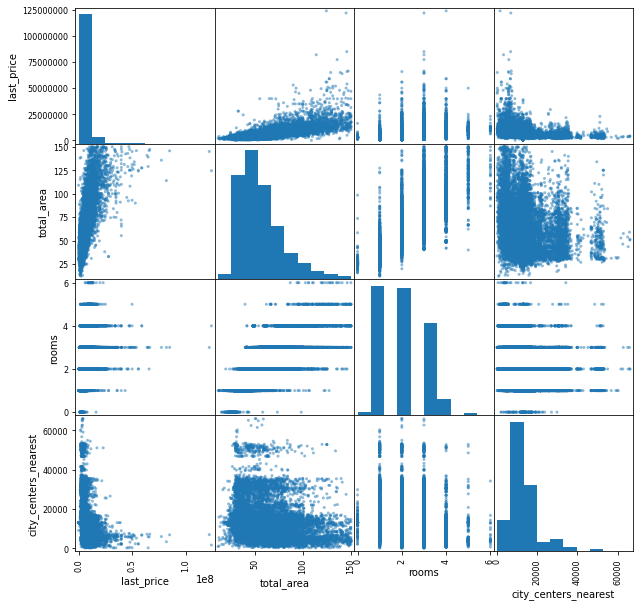

In [37]:
pd.plotting.scatter_matrix(df[arg], figsize=(10, 10));

Дополнительно построим матрицу корреляций:

In [38]:
df.corr()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,...,parks_nearest,ponds_nearest,days_exposition,sqm_price,weekday,month,year,living_to_total,kitchen_to_total,city_centers_km
last_price,1.000000,0.697641,0.400023,0.340701,0.063260,0.550307,0.058191,-0.047216,-0.030872,0.549772,...,0.011304,-0.105889,0.108136,0.775544,-0.013364,0.003570,-0.031348,-0.051914,-0.086805,-0.265830
total_area,0.697641,1.000000,0.787642,0.335018,-0.040935,0.901422,-0.026671,-0.101797,-0.060854,0.546875,...,0.008888,-0.071997,0.152149,0.198149,-0.011008,0.007175,-0.076494,0.142963,-0.374150,-0.191422
rooms,0.400023,0.787642,1.000000,0.149067,-0.222275,0.884225,-0.162079,-0.163612,-0.098464,0.173498,...,-0.042578,-0.028822,0.108280,-0.048847,-0.001533,-0.003267,-0.044933,0.512838,-0.608960,-0.116383
ceiling_height,0.340701,0.335018,0.149067,1.000000,-0.104360,0.275111,-0.065880,0.010457,0.004395,0.289396,...,-0.052942,-0.115898,0.082169,0.240766,-0.005815,0.000139,-0.084224,-0.038804,0.032092,-0.253263
floors_total,0.063260,-0.040935,-0.222275,-0.104360,1.000000,-0.172032,0.677096,0.070110,0.050522,0.205770,...,0.095053,0.036069,-0.047775,0.205698,0.011795,0.015277,0.005058,-0.352528,0.333837,0.015929
living_area,0.550307,0.901422,0.884225,0.275111,-0.172032,1.000000,-0.122619,-0.071552,-0.040528,0.277087,...,-0.037550,-0.049510,0.129237,0.070087,-0.006358,-0.000864,-0.062285,0.523292,-0.557286,-0.169585
floor,0.058191,-0.026671,-0.162079,-0.065880,0.677096,-0.122619,1.000000,0.037400,0.035199,0.148732,...,0.073686,0.026370,-0.039106,0.160219,0.011200,0.019117,0.004165,-0.256332,0.235519,0.011978
studio,-0.047216,-0.101797,-0.163612,0.010457,0.070110,-0.071552,0.037400,1.000000,-0.004234,-0.046204,...,0.010580,0.002209,-0.021674,0.023187,-0.001332,0.000912,0.011787,0.085770,0.098914,-0.008667
open_plan,-0.030872,-0.060854,-0.098464,0.004395,0.050522,-0.040528,0.035199,-0.004234,1.000000,-0.027069,...,0.010918,-0.002530,-0.023200,0.006591,0.010812,0.026531,-0.021531,0.059034,0.055923,-0.004200
kitchen_area,0.549772,0.546875,0.173498,0.289396,0.205770,0.277087,0.148732,-0.046204,-0.027069,1.000000,...,0.048078,-0.080117,0.089133,0.342441,-0.012603,0.006926,-0.043820,-0.378055,0.490453,-0.150708


И heatmap по нашему датафрейму:

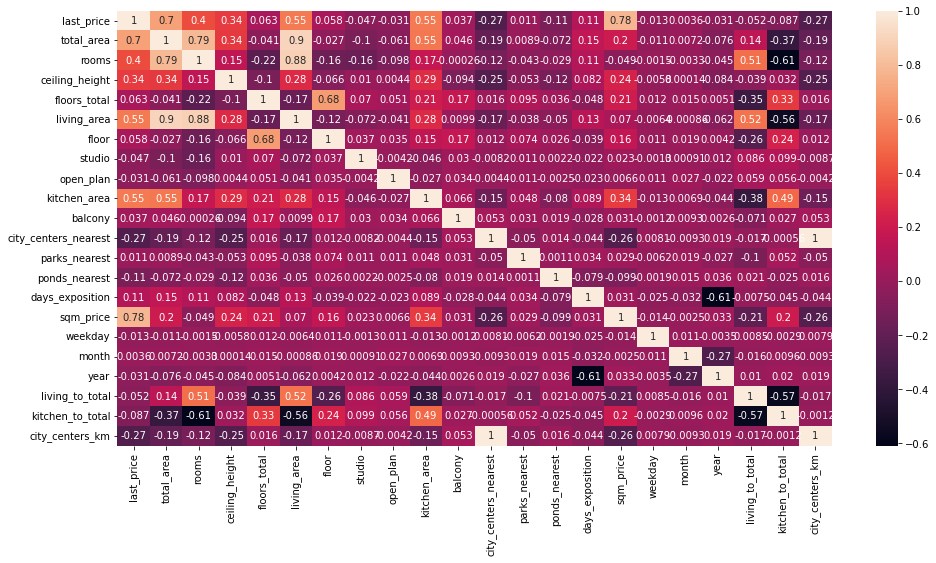

In [39]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True);

Данные подтверждают то, что логически очевидно: чем больше площадь квартиры, тем выше её цена (также видим значительную корреляцию этих данных), чем ближе к центру, тем больше дорогостоящих квартир. Менее очевидная закономерность между ценой и количеством комнат: до определенного момента мы видим, что цена увеличивается (до 3 комнат), но далее эта тенденция спадает. Возможно, это связано с тем, что в пределах города мы имеем преимущественно 2-3-х комнатные квартиры, а бОльшее число комнат имеется преимущественно в загородном жилье, стоимость которого ниже, чем в городе. 

Рассмотрим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Для этого ранее мы поделили наш датасет на категории в зависимости от этажа. Построим столбчатую диаграмму средних и медианных значений по категориям:

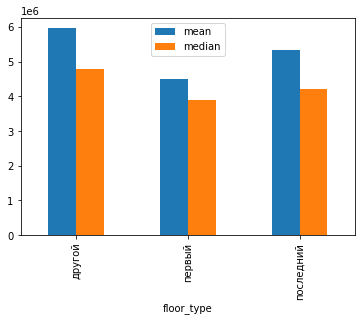

In [40]:
df.groupby('floor_type')['last_price'].agg(['mean', 'median']).plot.bar();

Опять же, видим достаточно очевидную закономерность: квартиры на первом этаже - самые дешевые, квартиры на промежуточных этажах - самые дорогие, и квартиры на послених этажах несколько дешевле промежуточных. Квартиры на первом этаже стоят примерно на 20% дешевле квартир на промежуточных этажах.

Изучим зависимость от даты размещения объявления: дня недели, месяца и года. Для этого мы ранее создали столбцы `weekday`, `month` и `year`. Построим столбчатые диаграммы (возьмем для наглядности среднее и медиану):

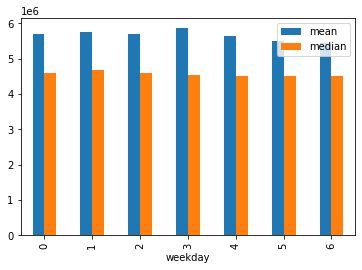

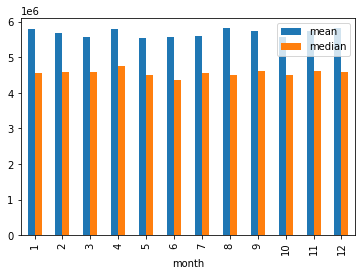

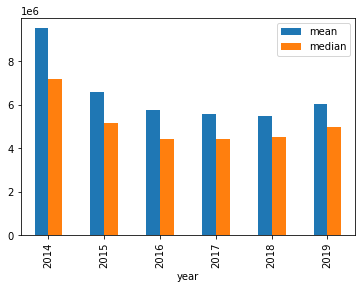

In [41]:
df.groupby('weekday')['last_price'].agg(['mean', 'median']).plot.bar()
df.groupby('month')['last_price'].agg(['mean', 'median']).plot.bar()
df.groupby('year')['last_price'].agg(['mean', 'median']).plot.bar();

Выраженной зависимости цены от дня недели, а также от месяца публикации не наблюдается. На диаграмме со значением `year`видим очень больше значения в 2014 и 2015 по сравнению с остальными годами. Проверим, какое количество значений в этих столбцах:

In [42]:
display(len(df[df['year'] == 2014]))
display(len(df[df['year'] == 2015]))

124

1125

Видим, что в этих столбцах довольно мало значений, поэтому можем предположить, что данные сильно искажены. В остальном наблюдается постепенный рост цен с течением времени.

**Вывод**

Мы выявили определенные закономерности в объявлениях: чем больше площадь квартиры, тем выше её цена, чем ближе к центру расположена квартира, тем она дороже. Также есть очевидная зависимость стоимости жилья от ее этажа. 
Очевидной связи между днем недели, месяцем и годом не выявлено, кроме того факта, что с течением времени жилье становится все дороже.

### Населенные пункты

Выберем 10 населённых пунктов с наибольшим числом объявлений и посчитаем среднюю цену квадратного метра в этих населённых пунктах:

In [43]:
df.groupby('locality_name')['sqm_price'].agg(['count','mean']).sort_values(by='count', ascending=False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,15162,112282.161550
посёлок Мурино,520,85725.241381
посёлок Шушары,440,78677.364217
Всеволожск,397,68703.119751
Пушкин,359,102866.519614
Колпино,337,75333.295801
посёлок Парголово,326,90332.263023
Гатчина,306,68757.678644
деревня Кудрово,299,92473.547576


Больше всего объявлений у нас по Санкт-Петербургу и ближайшим его пригородам. Из них лидерами по средней стоимости квадратного метра является Санкт-Петербург, элитный пригород Пушкин и курортный пригород Сестрорецк.

Также выделим населённые пункты с самой высокой и низкой стоимостью жилья:

In [44]:
top5 = df.pivot_table(index='locality_name', values='sqm_price').sort_values(by='sqm_price', ascending=False).head()
bottom5 = df.pivot_table(index='locality_name', values='sqm_price').sort_values(by='sqm_price').head()
display(top5, bottom5)

,sqm_price
locality_name,
посёлок Лисий Нос,121616.221359
Зеленогорск,117810.585243
Санкт-Петербург,112282.161550
Пушкин,102866.519614
Сестрорецк,102107.818481


,sqm_price
locality_name,
деревня Старополье,11206.221198
посёлок станции Свирь,11481.481481
деревня Вахнова Кара,11688.311688
деревня Выскатка,12335.480902
поселок Совхозный,12629.129129


И построим столбчатую диаграмму по этим данным:

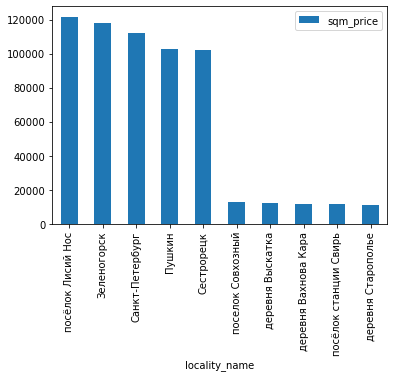

In [45]:
pd.concat([top5, bottom5]).sort_values(by='sqm_price', ascending=False).plot.bar();

Видим, что лидеры по стоимости жилья у нас немного поменялись: на первом и втором местах у нас курортные районы посёлок Лисий Нос и Зеленогорск, далее Пушкин, и замыкает пятерку курортный пригород Сестрорецк.

Самое дешевое жилье расположено в маленьких дальних населенных пунктах Ленинградской области. Цена за квадратный метр самого дешевого жилья отличается от цены за метр самого дорогого жилья более чем в 10 раз.

**Вывод**

Мы рассмотрели лидеров по количеству объявлений и их среднюю цену за квадратный метр, а также населенные пункты с самым дорогим и самым дешевым жильем за квадтратный метр.

### Расстояние от  центра

Выделим квартиры в Санкт-Петербурге. Для большей наглядности будем смотреть сегмент двухкомнатных квартир. Методом `.pivot_table()` создадим таблицу, в которой посчитаем среднюю цену для каждого километра:

In [46]:
spb_prices = (df.query('locality_name == "Санкт-Петербург" and rooms == 2')
              .pivot_table(index='city_centers_km', values='last_price'))

Построим график:

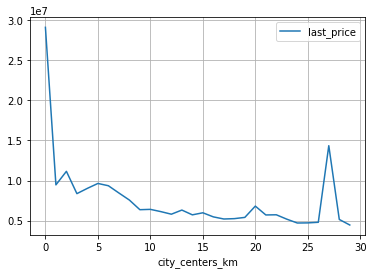

In [47]:
spb_prices.plot(grid=True);

Исходя из графика можем определить, что центр города ограничивается радиусом порядка 4 км. Мы видим на графике небольшой подъем после 4 км, но я бы предположила, что коррективы вносит стоимость жилья на Крестовском острове, который достаточно отдален от центра, но при этом является элитным районом города с дорогостоящим жильем.

**Вывод**

Мы рассмотрели, как меняется стоимость жилья в зависимости от удаленности от центра города, и определили, что центр города можно ограничить радиусом 4 км.

### Квартиры в центре. Анализ. Сравнение

Выделим сегмент квартир в центре (в пределах 4 км от центра города):

In [48]:
spb_center = df.query('city_centers_km <= 4')
spb_center.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1387 entries, 24 to 23694
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            1387 non-null   int32         
 1   total_area            1387 non-null   float64       
 2   first_day_exposition  1387 non-null   datetime64[ns]
 3   rooms                 1387 non-null   int64         
 4   ceiling_height        1387 non-null   float64       
 5   floors_total          1387 non-null   int32         
 6   living_area           1387 non-null   float64       
 7   floor                 1387 non-null   int64         
 8   studio                1387 non-null   bool          
 9   open_plan             1387 non-null   bool          
 10  kitchen_area          1387 non-null   float64       
 11  balcony               1387 non-null   int32         
 12  locality_name         1387 non-null   object        
 13  city_centers_nea

В нашу выборку  попали всего 1387 объявлений. Будем это учитывать при дальнейшем рассмотрении параметров, т.к. чем меньше значений, тем больше вероятность искажения данных. Будем иметь это в виду.
Построим гистограммы для следующих параметров: площадь, цена, число комнат, высота потолков. 

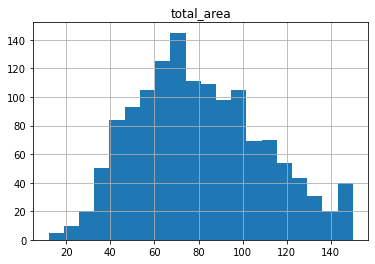

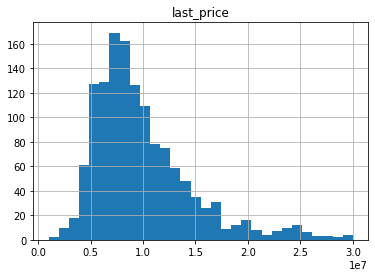

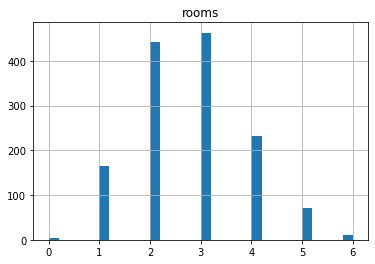

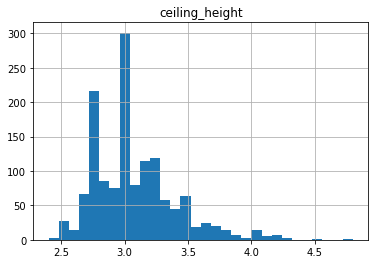

In [49]:
spb_center.hist('total_area', bins=20)
spb_center.hist('last_price', bins=30, range=(1000000,30000000))
spb_center.hist('rooms', bins=30)
spb_center.hist('ceiling_height', bins=30);

Видим измениения по сравнению с общей выборкой. На каждой гистограмме отчетливо видны пиковые значения по каждому параметру, которые мы можем явно выделить:
* общая площать 70 м²;
* стоимость жилья 8 млн.;
* количество комнат - 3;
* высота потолков 3 м.

Посмотрим, зависит ли цена от площади, числа комнат, удалённости от центра. Для этого построим матрицу рассеяния:

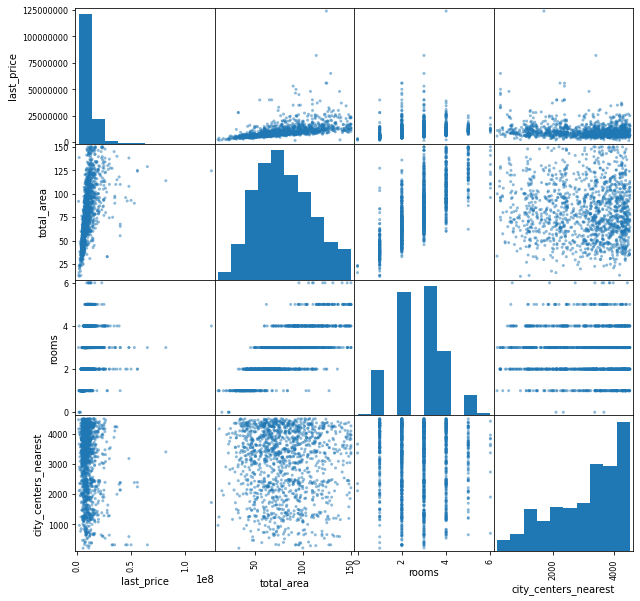

In [50]:
pd.plotting.scatter_matrix(spb_center[arg], figsize=(10, 10));

Дополнительно построим матрицу корреляций:

In [51]:
spb_center.corr()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,...,parks_nearest,ponds_nearest,days_exposition,sqm_price,weekday,month,year,living_to_total,kitchen_to_total,city_centers_km
last_price,1.000000,0.488283,0.230078,0.121431,0.048929,0.383135,0.078017,-0.049408,-0.035286,0.354374,...,-0.063417,-0.017647,0.088263,0.774398,-0.037053,-0.003753,-0.008702,-0.024956,-0.040471,-0.156919
total_area,0.488283,1.000000,0.753642,0.173288,-0.030837,0.886504,0.066841,-0.092071,-0.052761,0.413111,...,0.014982,0.068159,0.181687,-0.066894,-0.036470,-0.050316,-0.096319,0.121568,-0.342426,-0.047082
rooms,0.230078,0.753642,1.000000,0.092941,-0.127331,0.832108,-0.004311,-0.116745,-0.042883,0.089129,...,-0.030445,0.031440,0.152079,-0.205485,-0.001988,-0.052263,-0.068839,0.427448,-0.481261,-0.031703
ceiling_height,0.121431,0.173288,0.092941,1.000000,-0.201868,0.164985,-0.135472,0.005944,-0.001067,0.085523,...,0.015018,0.039127,0.077683,0.069530,-0.012214,-0.017749,0.016412,0.051559,-0.050280,-0.140635
floors_total,0.048929,-0.030837,-0.127331,-0.201868,1.000000,-0.129415,0.611881,-0.022348,-0.002792,0.059960,...,0.067010,0.136905,-0.005544,0.082041,-0.024776,0.021050,-0.002906,-0.233963,0.104213,0.272209
living_area,0.383135,0.886504,0.832108,0.164985,-0.129415,1.000000,0.002710,-0.067755,-0.032149,0.128934,...,-0.019221,0.057135,0.161570,-0.105989,-0.010361,-0.038633,-0.085787,0.531579,-0.506526,-0.048987
floor,0.078017,0.066841,-0.004311,-0.135472,0.611881,0.002710,1.000000,-0.043433,-0.032585,0.058523,...,0.021458,0.109752,0.037602,0.055028,0.029727,0.029638,-0.028873,-0.119368,0.005170,0.150992
studio,-0.049408,-0.092071,-0.116745,0.005944,-0.022348,-0.067755,-0.043433,1.000000,-0.001769,-0.040056,...,-0.025775,-0.005062,-0.040223,-0.007251,0.022890,0.033276,0.020332,0.067772,0.071492,0.000454
open_plan,-0.035286,-0.052761,-0.042883,-0.001067,-0.002792,-0.032149,-0.032585,-0.001769,1.000000,-0.014307,...,-0.050565,-0.043201,-0.020465,-0.013339,0.055679,0.054206,-0.039600,0.059591,0.102239,-0.016748
kitchen_area,0.354374,0.413111,0.089129,0.085523,0.059960,0.128934,0.058523,-0.040056,-0.014307,1.000000,...,-0.012533,0.014602,0.072256,0.133523,-0.017960,-0.057399,-0.008716,-0.422134,0.609019,-0.069140


И heatmap по нашему датафрейму:

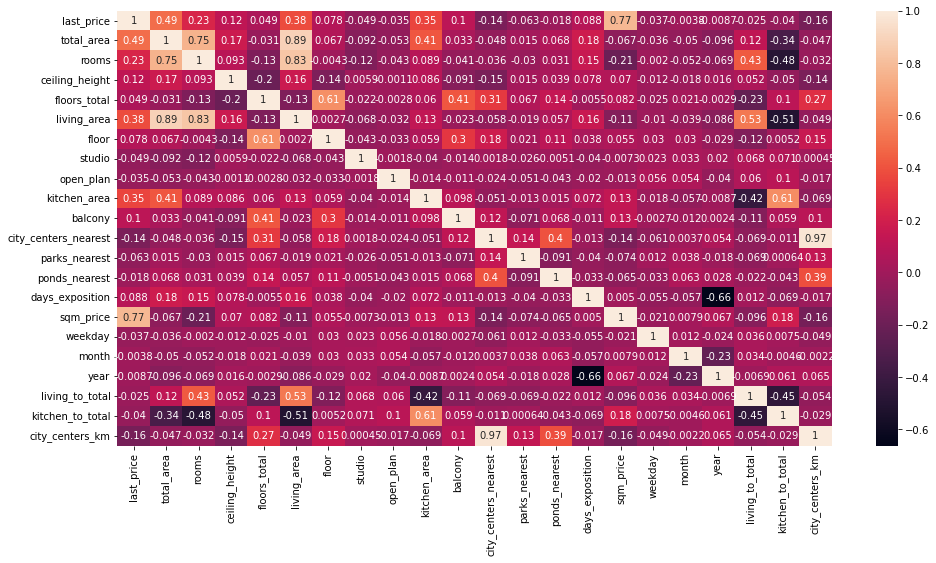

In [52]:
plt.figure(figsize=(16, 8))
sns.heatmap(spb_center.corr(), annot=True);

Для квартир в центре имеем зависимости, схожие с полученными ранее: чем больше площадь квартиры, тем выше её цена, по мере отдаления от самого центра города имеем тенденцию к снижению квартир по цене. Менее очевидная закономерность между ценой и количеством комнат, но можем отметить, что минимальная цена жилья растет с увеличением количества комнат.. 

Рассмотрим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Для этого ранее мы поделили наш датасет на категории в зависимости от этажа. Построим столбчатую диаграму средних и медианных значений по категориям:

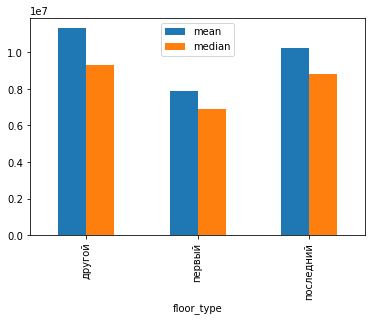

In [53]:
spb_center.groupby('floor_type')['last_price'].agg(['mean', 'median']).plot.bar();

Предыдущая тенденция сохраняется: квартиры на первом этаже - самые дешевые, квартиры на промежуточных этажах - самые дорогие, и квартиры на послених этажах несколько дешевле промежуточных. Квартиры на первом этаже стоят примерно на 25% дешевле квартир на промежуточных этажах. Увеличение этой разницы можно предположительно объяснить тем, что первые этажи в центре города расположены ниже, чем первые этажи во всем городе, т.к. преимущественно это старые здания. Такое расположение квартир является менее комфортным, поэтому они стоят дешевле (25% в центре против 20% по всему городу).

Изучим зависимость от даты размещения объявления: дня недели, месяца и года. Для этого мы ранее создали столбцы `weekday`, `month` и `year`. Построим столбчатые диаграммы (возьмем для наглядности среднее и медиану):

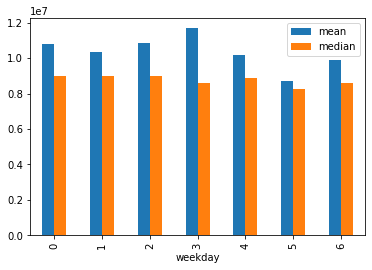

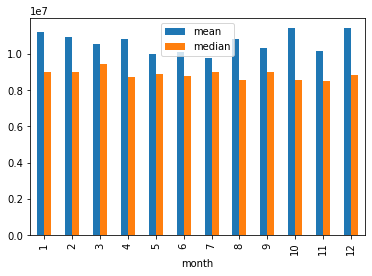

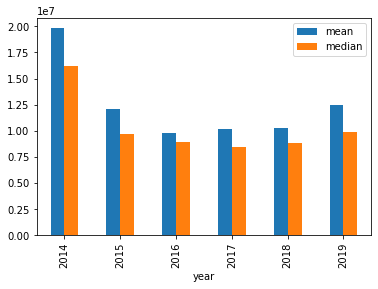

In [54]:
spb_center.groupby('weekday')['last_price'].agg(['mean', 'median']).plot.bar()
spb_center.groupby('month')['last_price'].agg(['mean', 'median']).plot.bar()
spb_center.groupby('year')['last_price'].agg(['mean', 'median']).plot.bar();

Видим колебания средней цены на первом и втором графике, но какую-либо тенденцию выделить сложно.  Как и в расчетах выше, имеем совсем малую статистику по 2014 и 2015 году, в связи с чем не рассматриваем эту часть графика как достоверную. Начиная с 2016 года цены на жилье постепенно растут.

Построим графики, на которых отобразим параметры (площадь, цена, число комнат, высота потолков) для центра и для остальной части города:

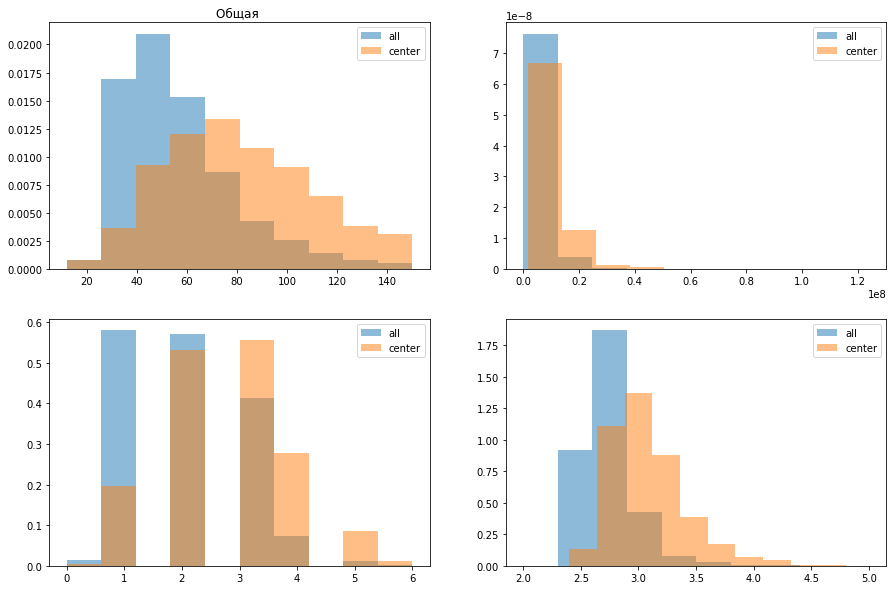

In [55]:
plt.figure(figsize=(15, 10))

ax1=plt.subplot(2, 2, 1)
plt.hist(df['total_area'], alpha=0.5, label='all', density=True)
plt.hist(spb_center['total_area'], alpha=0.5, label='center', density=True)
plt.title('Общая ')
plt.legend()

ax2=plt.subplot(2, 2, 2)
plt.hist(df['last_price'], alpha=0.5, label='all', density=True)
plt.hist(spb_center['last_price'], alpha=0.5, label='center', density=True)
plt.title('')
plt.legend()

ax3=plt.subplot(2, 2, 3)
plt.hist(df['rooms'], alpha=0.5, label='all', density=True)
plt.hist(spb_center['rooms'], alpha=0.5, label='center', density=True)
plt.title('')
plt.legend()

ax4=plt.subplot(2, 2, 4)
plt.hist(df['ceiling_height'], alpha=0.5, label='all', density=True)
plt.hist(spb_center['ceiling_height'], alpha=0.5, label='center', density=True)
plt.title('')
plt.legend()
plt.show()

Видим, что у квартир в центре, по сравнению с квартирами в остальной части города, все представленные параметры на графике преимущественно смещены вправо.

**Вывод**

Закономерности, выявленные нами ранее, в основном сохранились: чем больше площадь квартиры, тем выше её цена, чем ближе к центру расположена квартира, тем она дороже. Также есть очевидная зависимость стоимости жилья от этажа. 
Очевидной связи между днем недели, месяцем и годом не выявлено, кроме того факта, что с течением времени жилье становится все дороже.

<a id="step5"></a>
## Общий вывод

Мы провели исследование объявлений о продаже квартир в Санкт-Петербурге и Ленинградской области в период с 2014 по 2019 год.

В исследовании мы смотрели, как различные факторы влияют на стоимость жилья. Из общего массива данных мы выделили категорию квартир в центре города и сравнили их с общим массивом данных. Вот какие различия в пиковых значениях мы увидели:
* площать квартиры: центр – 70 м², общее – 40-45 м²;
* стоимость жилья: центр – 8 млн., общее – 4 млн.;
* количество комнат: центр – 3, общее – 2;
* высота потолков: центр – 3 м, общее – 2.7 м.

Также на стоимость жилья оказывает влияние этаж, на котором расположена квартира. Наиболее дешевыми являются квартиры на первом этаже (на 20% ниже от среднего этажа в общем, и на 25% ниже в центре города), несколько дороже - квартиры на последних этажах. Промежуточные квартиры являются самыми дорогими.

Наиболее высокими по стоимости являются квартиры в центре Санкт-Петербуга, а также в элитных пригородных районах. Чем ближе к центру расположена квартира, тем она дороже. Самые дешевые квартиры расположены в дальних населенных пунктах Ленобласти.

Прослеживается очевидная прямая зависимость между площадью жилья и его стоимостью. Явной зависимости между ценой и количеством комнат, а также от даты размещения не выявлено. Стоит отметить, что год от года жилье постепенно дорожает.

Средняя продолжительность продажи квартиры составляет около 3 месяцев. Продажи,  произошедшие в течение 1 месяца можно назвать быстрыми, а продажи более 200 дней - очень медленными.

<a id="step6"></a>
## Баг-репорт

В колонках, которые заполненны автоматически на основе картографических данных, таких как "parks_nearest" и "ponds_nearest" обнаружено большое количество пропусков (из общего числа 23699 - это 15620 и 14589 соответственно).

Также в колонке "is_apartment" отсутствует 20924 значений.